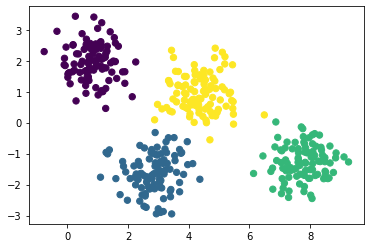

In [59]:
from matplotlib import pyplot as plt
#产生实验数据
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] #交换列是为了方便画图

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [60]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))
print(len(probs))
print(len(X))

[[0.    0.    0.463 0.537]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]]
400
400


In [61]:
colors = [(68,1,84), # purple
          (51,105,143), # blue
          (53, 183, 121), # green
          (253,231,37), # yellow
          ]
def get_all_rgb(probs):
    all_rgb = []
    for sample in probs:
        r = 0
        g = 0
        b = 0
        for i,probability in enumerate(sample):
            r += probability * colors[i][0]
            g += probability * colors[i][1]
            b += probability * colors[i][2]
        all_rgb.append((r/255,g/255,b/255))
    return all_rgb

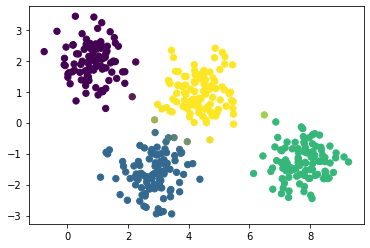

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=get_all_rgb(probs), s=40)

400


C:\Users\89150\AppData\Local\Temp\ipykernel_13204\3388207561.py:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


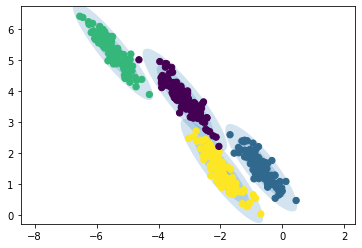

In [63]:
from matplotlib.patches import Ellipse
import numpy as np

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """用给定的位置和协方差画一个椭圆"""
    ax = ax or plt.gca()

    #将协方差转换为主轴
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    #画出椭圆
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

#用椭圆形来拟合数据
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)


In [72]:
def my_plot_gmm(gmm, X, samples_rgb,label=True, ax=None):
    ax = ax or plt.gca()
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=samples_rgb, s=40, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [68]:
gmm.fit(X_stretched)
probs = gmm.predict_proba(X_stretched)
print(probs)
samples_rgb = get_all_rgb(probs)
print(samples_rgb)

[[5.74876674e-01 1.57650321e-22 4.25123071e-01 2.55374096e-07]
 [1.06652119e-09 4.53546582e-15 1.90957124e-17 9.99999999e-01]
 [2.37101929e-09 2.92853046e-17 2.34378258e-14 9.99999998e-01]
 ...
 [5.89991829e-08 9.99999920e-01 1.08972061e-36 2.05299504e-08]
 [5.54114043e-01 3.68290892e-04 2.08418557e-15 4.45517666e-01]
 [1.76093911e-11 1.00000000e+00 3.80709722e-47 5.71567299e-14]]
[(0.24165961246383078, 0.30734297125230003, 0.3910962416733868), (0.992156861971344, 0.9058823519792142, 0.14509803941226268), (0.9921568610249287, 0.9058823508026059, 0.14509803965270546), (0.26672920260369326, 0.00399931627778626, 0.32939587730655756), (0.9921568613203607, 0.9058823511699063, 0.14509803957765746), (0.20784313725853756, 0.7176470587795312, 0.47450980391261965), (0.2000000017514579, 0.411764695181573, 0.560784307653028), (0.27664618085993026, 0.016328534270617368, 0.32687642906824077), (0.9921535054434156, 0.9058781790000453, 0.14509889215243563), (0.20000026327362758, 0.41176311295102047, 0.

C:\Users\89150\AppData\Local\Temp\ipykernel_13204\3388207561.py:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


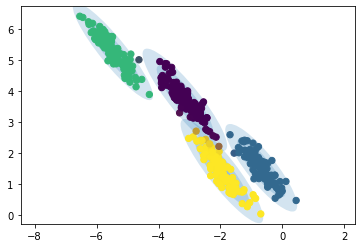

In [73]:
my_plot_gmm(gmm,X_stretched,samples_rgb)
